In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import glob

In [2]:
def log_scaling(t, A):
    return A*np.log(np.abs(t))

# Exponential decay function
def crit_decay(x, A, k):
    return A*np.abs(x)**(-k)

In [3]:
ems = []
for file in glob.glob("data/*_EM_*"):
    ems.append(pd.read_csv(file, skiprows = 3))



In [4]:
ems

[    Temp    E_mean     E_std    M_mean     M_std
 0    1.6 -1.910170  0.086357 -0.973723  0.029444
 1    1.7 -1.898668  0.093227  0.970874  0.030516
 2    1.8 -1.848698  0.122105  0.952098  0.049929
 3    1.9 -1.818068  0.140324  0.944189  0.051116
 4    2.0 -1.749966  0.153568 -0.918240  0.060514
 5    2.1 -1.653499  0.186537  0.872410  0.100788
 6    2.2 -1.543077  0.212366 -0.829506  0.105788
 7    2.3 -1.440024  0.244038  0.356427  0.690233
 8    2.4 -1.200584  0.268153  0.158400  0.609333
 9    2.5 -1.237207  0.264965  0.305721  0.584414
 10   2.6 -1.069026  0.231659  0.349962  0.408319
 11   2.7 -0.952635  0.210369  0.274939  0.325609
 12   2.8 -0.868906  0.212584  0.122416  0.367509
 13   2.9 -0.856539  0.224622 -0.071902  0.375054
 14   3.0 -0.752270  0.196748  0.046497  0.282623
 15   3.1 -0.729686  0.192684 -0.030518  0.306078
 16   3.2 -0.696687  0.194043 -0.016827  0.283417
 17   3.3 -0.649462  0.177973 -0.010826  0.248966
 18   3.4 -0.646921  0.183490 -0.002164  0.254181


N,n_steps,n_analyze,flip_perc
100,60000,5000,0.1


In [5]:
em = pd.read_csv("good_data_v1/2.00T2.50_EM_v0.csv", skiprows=3)
em= em[1:]

FileNotFoundError: [Errno 2] No such file or directory: 'good_data_v1/2.00T2.50_EM_v0.csv'

In [6]:
def get_reducedT(data, Tc = 2.23):
    t = (data["Temp"] - Tc)/Tc
    return t

In [7]:
em

NameError: name 'em' is not defined

In [8]:
def sigmoid(x, a, b, c):
    return  a - a / (1 + np.exp(-b * (x - c)))

In [9]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(em["Temp"], np.absolute(em["M_mean"]), yerr=em["M_std"],fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data",zorder = -1)
popt_l, pcov_l = curve_fit(sigmoid, em["Temp"], np.absolute(em["M_mean"]), p0=(1.0, 1,1), maxfev = 2000)
plt.plot(em["Temp"], sigmoid(em["Temp"], *popt_l), label= "Fit",color= "olivedrab")
plt.axvline(popt_l[2], label = "Tc: {0:.2f} $\pm$ {1:0.2f}".format(popt_l[2], np.sqrt(pcov_l[2][2])*10,), color = "r")
#plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {0:.2f} $\pm$ {1:.2f}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), 0.08))
plt.legend()
#plt.text(4.25, 0.5, r' $\chi^2=19.3$', fontsize=12)
plt.xlabel("Temperature ($T[J/k_b]$)")
plt.ylabel("|M| ($a^{-3}$)")
plt.legend()
plt.show()

NameError: name 'em' is not defined

<Figure size 1000x800 with 0 Axes>

In [8]:
popt_l[2]

2.2400968671227677

In [9]:
t = get_reducedT(em)

In [10]:
min(t)

-0.10089686098654713

### C_v

In [39]:
cvs = []
for em in ems:
    cvs.append(get_cv(em))

In [47]:
np.mean(np.matrix(cvs)[:,1])

0.00017416152221357302

In [31]:
for i in range(np.matrix(cvs)

matrix([[0.00016809, 0.00017286, 0.0001747 , ..., 0.00022309, 0.00022001,
         0.00022228],
        [0.00016769, 0.0001669 , 0.00017308, ..., 0.00021931, 0.00021795,
         0.00021885],
        [0.00016917, 0.00017223, 0.00018625, ..., 0.00021718, 0.00022142,
         0.00022076],
        ...,
        [0.00016735, 0.00017901, 0.00017478, ..., 0.00023093, 0.00022656,
         0.00021148],
        [0.00017892, 0.00017248, 0.00017935, ..., 0.00022716, 0.00022463,
         0.00022017],
        [0.00017735, 0.00017744, 0.0001777 , ..., 0.0002173 , 0.0002236 ,
         0.0002204 ]])

In [78]:
tol = 0.15
t= t [(t < tol)]
t = t [(t > -tol)]

In [79]:
def get_cv_avg(ems):
    cvs = []
    for em in ems:
        cvs.append(get_cv(em))
    
    means = []
    errs = []
    for i in range(len(cvs[0])):
        means.append(np.mean(np.matrix(cvs)[:,i]))
        errs.append(np.std(np.matrix(cvs)[:,i]))
    return pd.Series(means),pd.Series(errs)

In [80]:
def get_cv(data):

    cv = 1/data["Temp"] * data["E_std"]**2
    return cv

In [81]:
cv, err = get_cv_avg(ems)

In [99]:
popt, pcov = curve_fit(crit_decay, t, cv[t.index], p0=(1.0, 1))

In [83]:
alpha = popt[1]

In [125]:
def get_alpha(t, gamma, A1, A2,C, tol = 0.0045, tol2= 0.01):
    
    y = np.piecewise(t, [t < -tol, t > tol2,  (t > -tol)& (t < tol2)],
                     #[lambda t:A1*np.abs(t)**(-gamma) , lambda t:A2*np.abs(t)**(-gamma), C])
                     [lambda t:A1*np.log(np.abs(t)) , lambda t:A2*np.log(np.abs(t)), C])
    return y
    

In [130]:
chi2 = 1.8
for i in range(0,len(t)):
    chi2 += (list(get_alpha(np.array(t), *popt))[i] - list(cv)[i])**2/(np.sqrt(np.abs(list(t)[i])*np.sqrt(pcov[0][0])))

chi2/2

0.9

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33068/301758547.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(get_alpha, np.array(t), cv[t.index], p0=(1.0, 1,1,1))


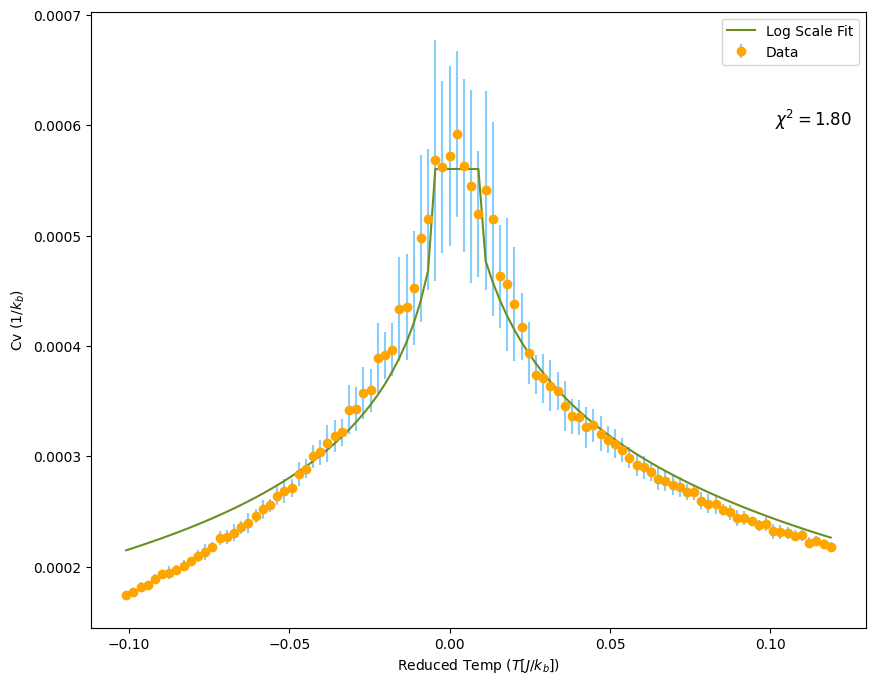

In [131]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(t, cv[t.index], yerr= err[t.index], fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data" )
#plt.title("Heat Capacity Critical Exponent")
popt, pcov = curve_fit(get_alpha, np.array(t), cv[t.index], p0=(1.0, 1,1,1))
plt.plot(t, get_alpha(np.array(t),*popt ), color= "olivedrab", label = "Log Scale Fit")
plt.text(0.1, 0.0006, r' $\chi^2={0:.2f}$'.format(chi2), fontsize=12)
plt.legend()
plt.xlabel("Reduced Temp ($T[J/k_b]$)")
plt.ylabel("Cv ($1/k_b$)")
plt.show()

In [132]:
popt

array([ 1.00000000e+00, -9.36592556e-05, -1.06239769e-04,  5.60460915e-04])

In [124]:
popt[0]

0.37987945683833807

In [90]:
pcov[1][1]

8.204256798982661e-12

0.019595368609589804

In [25]:
pcov

array([[ 1.76930191e-04, -6.50372985e-08, -7.23519291e-08,
         0.00000000e+00],
       [-6.50372985e-08,  2.79831919e-11,  2.65956532e-11,
         0.00000000e+00],
       [-7.23519291e-08,  2.65956532e-11,  3.33490851e-11,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.47651433e-10]])

In [26]:
alpha

0.02951115922370034

In [27]:
popt, pcov = curve_fit(crit_decay, t, cv[t.index], p0=(1.0, 1))

In [28]:
popt

array([0.00028302, 0.02951116])

In [29]:
alpha 

0.02951115922370034

TypeError: log_scaling() takes 2 positional arguments but 3 were given

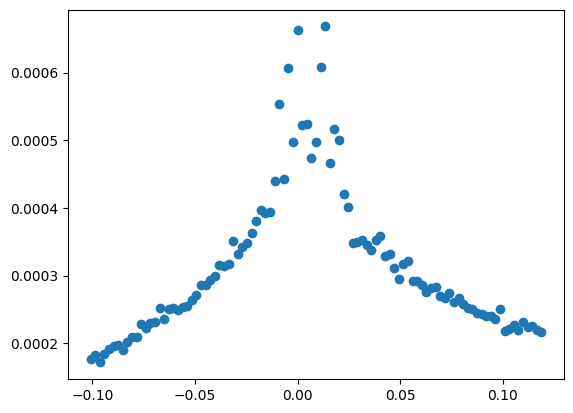

In [30]:
plt.scatter(t, cv[t.index])
plt.plot(t, log_scaling(t, *popt), color = "orange")

### M

In [180]:
t = get_reducedT(em)
print(min(t))
tol = 0.2
t = t [(t < -0.001)]
t= t [(t > -tol)]


-0.10313901345291479


In [181]:
# Exponential decay function
def beta_fit(x, A, k):
    return A*np.abs(x)**(k)

In [182]:
def get_M_avg(ems):
    cvs = []
    for em in ems:
        cvs.append(np.absolute(em["M_mean"]))
    
    means = []
    errs = []
    for i in range(len(cvs[0])):
        means.append(np.mean(np.matrix(cvs)[:,i]))
        errs.append(np.std(np.matrix(cvs)[:,i]))
    return pd.Series(means),pd.Series(errs)

In [725]:
M,errs = get_M_avg(ems)


In [733]:
T= ems[0]["Temp"]

In [ ]:
onsager(np.array(T))

In [750]:
def onsager(T):
    out = []
    for t in T:
        if t < 2.269:
            out.append((1-(np.sinh(2/t))**(-4))**(0.125))
        else:
            out.append(0)
    return out
        

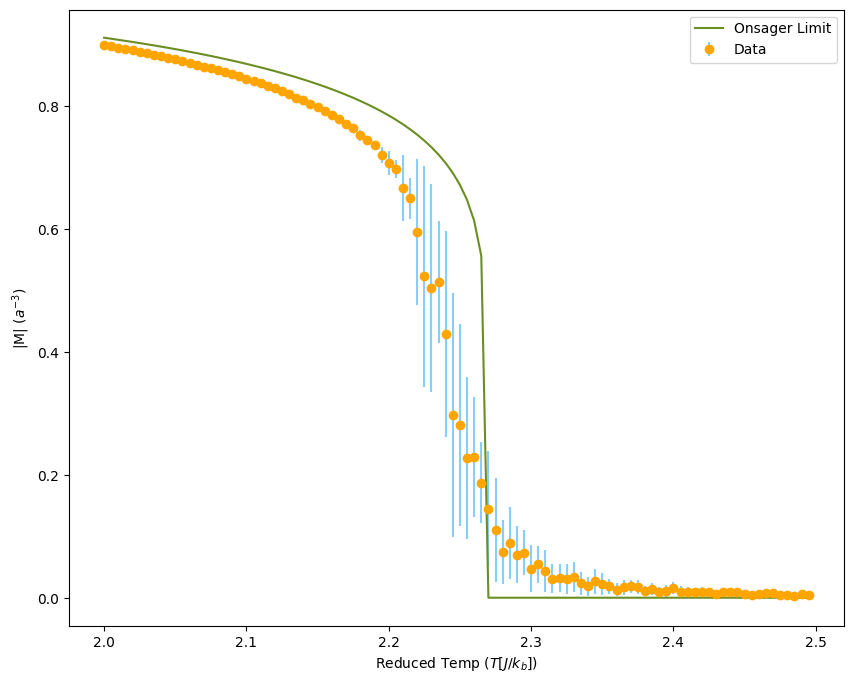

In [755]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(T, M, yerr= errs, fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data" )
plt.plot(T, onsager(np.array(T)), color = "olivedrab", label = "Onsager Limit")
plt.legend()
plt.xlabel("Reduced Temp ($T [J/k_b]$)")
plt.ylabel("|M| ($a^{-3}$)")
plt.show()

In [185]:
pcov[1][1]

3.4650332121350734e-06

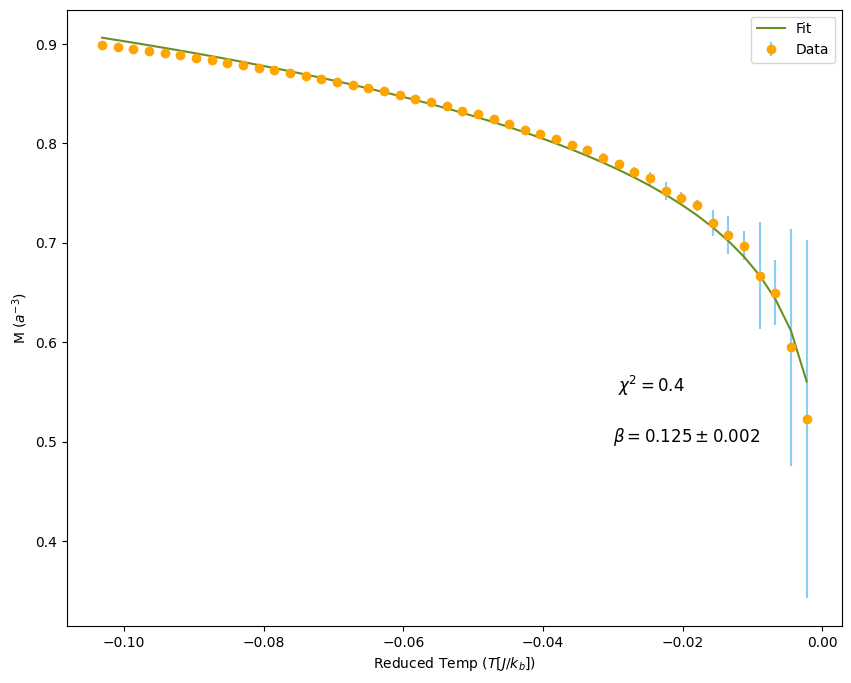

In [188]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(t, M[t.index], yerr= errs[t.index], fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data" )
#plt.title("Heat Capacity Critical Exponent")
popt, pcov = curve_fit(beta_fit, t, M[t.index], p0=(0.9, 1/8))
plt.plot(t, beta_fit(t,*popt ), color= "olivedrab", label = "Fit")
plt.text(-0.03, 0.55, r' $\chi^2=0.4$', fontsize=12)
plt.text(-0.03, 0.5, r'$\beta={0:.3f} \pm {1:0.3f}$'.format(popt[1],np.sqrt(pcov[1][1])), fontsize=12)
plt.legend()
plt.xlabel("Reduced Temp ($T[J/k_b]$)")
plt.ylabel("M ($a^{-3}$)")
plt.show()

In [157]:
pcov

array([[4.94796193e-05, 1.27121533e-05],
       [1.27121533e-05, 3.46503321e-06]])

In [155]:
chi2 = 0
for i in range(0,len(t)):
    
    chi2 += (list(beta_fit(np.array(t), *popt)[i]) - list(M)[i])**2/(np.sqrt(np.abs(list(t)[i])*np.sqrt(pcov[0][0]) + np.sqrt(pcov[1][1])))

chi2/len(t)

TypeError: 'numpy.float64' object is not iterable

In [38]:
popt, pcov = curve_fit(beta_fit, t, M[t.index], p0=(0.0003, -1/8))

In [39]:
popt

array([1.154547  , 0.11033483])

In [40]:
# expected 1/8

(popt[1] - 1/8)*8

-0.11732132753935343

In [41]:
beta = popt[1]
beta

0.11033483405758082

In [42]:
np.sqrt(pcov[1][1])

0.0029086674261868868

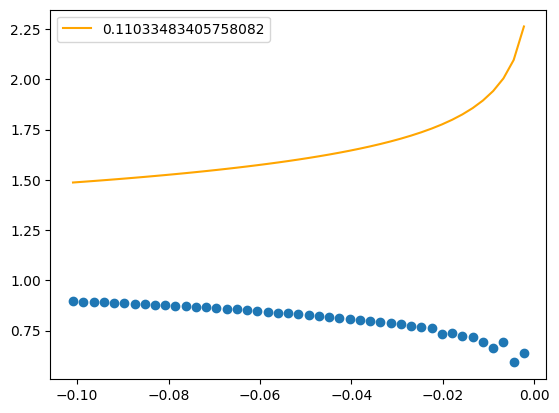

In [43]:
plt.scatter(t, M[t.index])
plt.plot(t, crit_decay(t, *popt), color = "orange", label = "{}".format(beta))
plt.legend()

### Magneetic Susceptibility

In [204]:
t = get_reducedT(em, Tc = 2.24)
tol = 0.1
t= t [(np.abs(t) < tol)]
t= t [(np.abs(t) > 0.005)]
# t = t [(t > -tol)]
# t= t [(t < -0.0001)]


In [205]:
def get_ms(data):

    ms = data["M_std"]**2
    return ms

In [206]:
def get_ms_avg(ems):
    cvs = []
    for em in ems:
        cvs.append(get_ms(em))
    
    means = []
    errs = []
    for i in range(len(cvs[0])):
        means.append(np.mean(np.matrix(cvs)[:,i]))
        errs.append(np.std(np.matrix(cvs)[:,i]))
    return pd.Series(means),pd.Series(errs)

In [207]:
ms,err= get_ms_avg(ems)

In [208]:
ms

0     0.000098
1     0.000102
2     0.000108
3     0.000115
4     0.000117
        ...   
95    0.004730
96    0.004717
97    0.004562
98    0.004369
99    0.004316
Length: 100, dtype: float64

In [227]:
def get_gamma(t, gamma, A1, A2,C, tol = 0.005, tol2= 0.025):
    
    y = np.piecewise(t, [t < -tol, t > tol2,  (t > -tol)& (t < tol2)],
                     [lambda t:A1*np.abs(t)**(-gamma) , lambda t:A2*np.abs(t)**(-gamma), C])
    return y
    


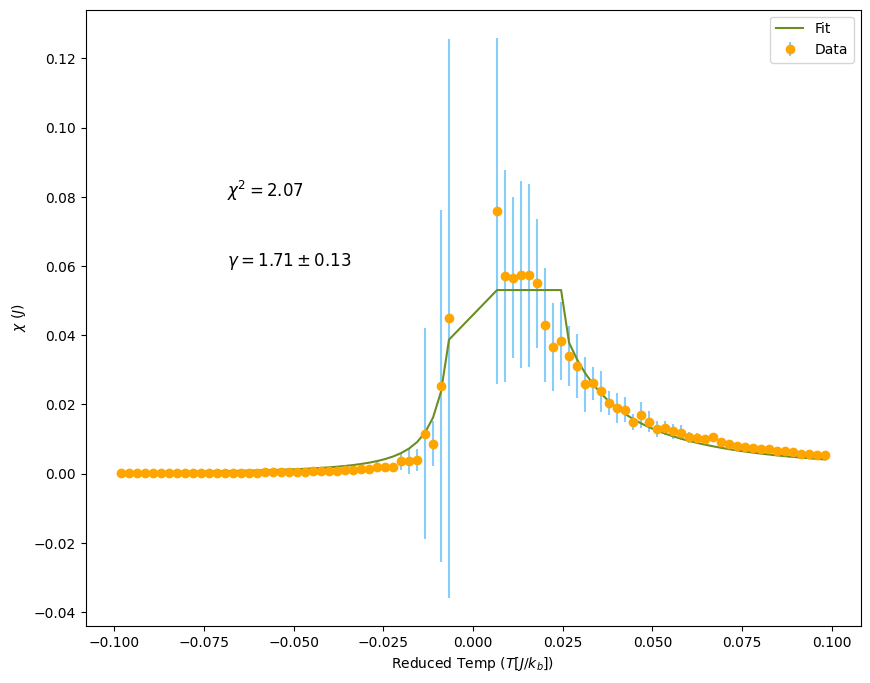

In [230]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(t, ms[t.index], yerr= err[t.index], fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data" )
#plt.title("Heat Capacity Critical Exponent")
popt, pcov = curve_fit(get_gamma,   np.array(t), ms[t.index],p0=[7/4, 0.001, 0.03, 0.08])
plt.plot(t, get_gamma(np.array(t),*popt ), color= "olivedrab", label = "Fit")
plt.text(-0.07, 0.08, r' $\chi^2=2.07$', fontsize=12)
plt.text(-0.07, 0.06, r' $\gamma={0:.2f} \pm {1:.2f}$'.format(popt[0], np.sqrt(pcov[0][0])), fontsize=12)
plt.legend()
plt.xlabel("Reduced Temp ($T[J/k_b]$)")
plt.ylabel("$\chi$ ($J$)")
plt.show()

In [229]:
chi2 = 0
for i in range(0,len(t)):
    
    chi2 += (list(get_gamma(np.array(t), *popt))[i] - list(ms)[i])**2/(np.sqrt(np.abs(list(t)[i])*np.sqrt(pcov[0][0]) * np.sqrt(pcov[1][1])))

chi2/len(t)

2.0727412096270443

In [52]:
# min_err = 1000
# min_tol = 0
# for tol in np.linspace(0.001, 0.1, 100):
#     t = get_reducedT(em)
#     t = t [(t < tol)]
#     t= t [(t > -tol)]
#     popt, pcov = curve_fit(crit_decay, np.abs(t), ms[t.index], p0=(1.0, 1))
#     error = (popt[1] - 7/4)/(7/4)
#     if np.abs(error) < min_err:
#         min_err = np.abs(error)
#         min_tol = tol

In [176]:
popt

array([1.68659996e+00, 8.26620456e-06, 8.41027063e-05, 5.30639596e-02])

In [54]:
np.sqrt(pcov[1][1])

1.6420857499391384e-05

In [55]:
gamma = popt[0]

In [177]:
7/4

1.75

In [57]:
gamma

1.4275691421532288

In [58]:
(gamma - 7/4)/(7/4)

-0.18424620448386925

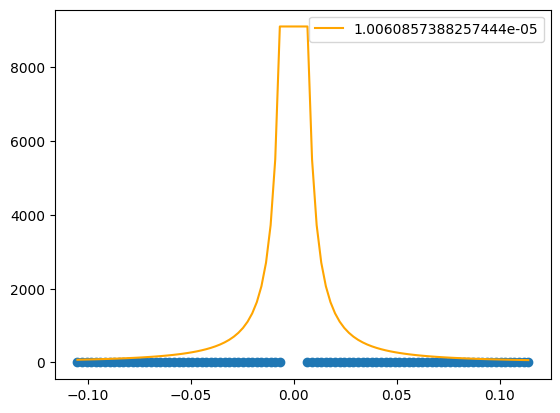

In [59]:
plt.scatter(t, ms[t.index])
plt.plot(t, crit_decay(t, popt[0], 7/4), color = "orange", label = "{}".format(popt[1]))
plt.legend()

### v

In [60]:
sc = pd.read_csv("500000_steps/2.00T2.50_SC_v0.csv", index_col = "Temp", skiprows=3)
sc = sc.iloc[:, :-1]

In [469]:
scs = []
for file in glob.glob("data/*_SC_*"):
    scs.append(pd.read_csv(file, index_col = "Temp",skiprows = 3).iloc[:, :-1])



In [296]:
sc = pd.read_csv("good_data_v1/2.00T2.50_SC_v0.csv", index_col = "Temp",skiprows=3)
sc = sc.iloc[:, :-1]

In [297]:
scs[0]

,d=1,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,...,d=40,d=41,d=42,d=43,d=44,d=45,d=46,d=47,d=48,d=49
Temp,,,,,,,,,,,,,,,,,,,,,
2.000,0.000531,0.000197,0.000067,0.000012,-0.000020,-0.000040,-0.000050,-0.000061,-4.957767e-05,-0.000040,...,-0.000038,-0.000041,-0.000064,-0.000040,-0.000038,-0.000045,-0.000063,-0.000047,-0.000046,-0.000019
2.005,0.000658,0.000247,0.000067,0.000027,-0.000008,-0.000009,-0.000061,-0.000078,-5.939929e-05,-0.000029,...,-0.000076,-0.000069,-0.000051,-0.000030,-0.000033,-0.000057,-0.000045,-0.000035,-0.000021,-0.000060
2.010,0.000407,0.000136,0.000017,-0.000008,-0.000030,-0.000036,-0.000030,-0.000034,-2.799125e-05,-0.000021,...,-0.000010,-0.000028,-0.000024,-0.000033,-0.000046,-0.000058,-0.000055,-0.000034,-0.000058,-0.000029
2.015,0.000628,0.000188,0.000062,0.000004,-0.000005,-0.000016,-0.000025,-0.000045,-3.663798e-05,-0.000031,...,-0.000018,-0.000028,-0.000052,-0.000055,-0.000050,-0.000060,-0.000068,-0.000046,-0.000026,-0.000069
2.020,0.000393,0.000128,0.000022,0.000004,-0.000013,-0.000012,-0.000002,-0.000029,-4.055627e-07,-0.000033,...,-0.000047,-0.000034,-0.000031,-0.000039,-0.000035,-0.000040,-0.000047,-0.000061,-0.000066,-0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.475,0.004631,0.002791,0.001905,0.001264,0.000845,0.000464,0.000246,0.000082,-7.831749e-05,-0.000243,...,-0.000423,-0.000347,-0.000183,-0.000155,-0.000219,-0.000275,-0.000282,-0.000234,-0.000163,-0.000227
2.480,0.004767,0.002893,0.001795,0.001023,0.000540,0.000229,0.000013,-0.000198,-2.675421e-04,-0.000336,...,-0.000389,-0.000399,-0.000400,-0.000315,-0.000358,-0.000352,-0.000332,-0.000274,-0.000381,-0.000423
2.485,0.004739,0.002840,0.001985,0.001343,0.000822,0.000479,0.000261,0.000079,-6.466698e-05,-0.000132,...,-0.000637,-0.000522,-0.000437,-0.000408,-0.000366,-0.000328,-0.000359,-0.000287,-0.000230,-0.000145


In [298]:
sc

,d=1,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,...,d=40,d=41,d=42,d=43,d=44,d=45,d=46,d=47,d=48,d=49
Temp,,,,,,,,,,,,,,,,,,,,,
2.000,0.000621,0.000156,0.000021,-0.000034,-0.000047,-0.000042,-0.000037,-0.000044,-0.000029,-0.000050,...,-0.000029,-0.000052,-0.000032,-0.000046,-0.000047,-0.000045,-0.000045,-0.000027,-0.000002,-0.000016
2.005,0.000392,0.000075,-0.000012,-0.000030,-0.000016,-0.000040,-0.000021,-0.000032,-0.000038,-0.000022,...,-0.000042,-0.000040,-0.000026,-0.000030,-0.000032,-0.000028,-0.000027,-0.000020,-0.000021,-0.000028
2.010,0.000463,0.000141,0.000032,-0.000017,-0.000034,-0.000061,-0.000044,-0.000060,-0.000047,-0.000061,...,-0.000056,-0.000044,-0.000021,-0.000013,-0.000034,-0.000038,-0.000036,-0.000021,-0.000056,-0.000056
2.015,0.000484,0.000164,0.000047,-0.000011,-0.000034,-0.000039,-0.000035,-0.000032,-0.000024,-0.000046,...,0.000006,-0.000033,-0.000034,-0.000054,-0.000055,-0.000043,-0.000039,-0.000053,-0.000043,-0.000030
2.020,0.000505,0.000151,0.000048,0.000001,-0.000033,-0.000052,-0.000039,-0.000015,-0.000031,-0.000006,...,-0.000028,-0.000055,-0.000065,-0.000054,-0.000019,-0.000028,-0.000026,-0.000026,-0.000028,-0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.475,0.004733,0.002969,0.002022,0.001333,0.000937,0.000660,0.000439,0.000233,0.000016,-0.000127,...,-0.000741,-0.000724,-0.000719,-0.000751,-0.000749,-0.000752,-0.000671,-0.000622,-0.000627,-0.000525
2.480,0.004737,0.002836,0.001917,0.001249,0.000743,0.000511,0.000456,0.000265,0.000142,-0.000055,...,-0.000599,-0.000483,-0.000485,-0.000543,-0.000495,-0.000413,-0.000467,-0.000459,-0.000480,-0.000525
2.485,0.004592,0.002634,0.001629,0.000931,0.000464,0.000200,0.000045,-0.000023,-0.000093,-0.000172,...,-0.000495,-0.000435,-0.000330,-0.000283,-0.000297,-0.000252,-0.000168,-0.000120,-0.000033,-0.000071


In [496]:
max_ind = np.where(sc.iloc[-1] <0 )[0].min()

In [498]:
[i+1 for i in range(max_ind)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [502]:
sc.iloc[-1][:max_ind]

d=1    0.004684
d=2    0.002825
d=3    0.001755
d=4    0.001162
d=5    0.000798
d=6    0.000501
d=7    0.000249
d=8    0.000161
d=9    0.000070
Name: 2.494999999999989, dtype: float64

In [532]:
def decay(x,k,A):
    return A*np.exp(-x/k)

In [524]:
np.array([i+1 for i in range(max_ind)])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [517]:
decay(np.array([i+1 for i in range(max_ind)]), 3)

array([0.71653131, 0.51341712, 0.36787944, 0.26359714, 0.1888756 ,
       0.13533528, 0.09697197, 0.06948345, 0.04978707])

In [518]:
curve_fit(decay, np.array([i+1 for i in range(max_ind)]), sc.iloc[-1][:max_ind], p0=(2), maxfev=2000000 )

(array([0.18663725]), array([[9.06581323e-05]]))

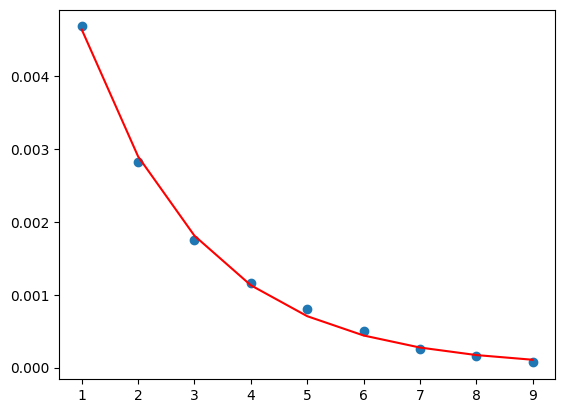

In [535]:
plt.scatter([i+1 for i in range(max_ind)], sc.iloc[-1][:max_ind])
popt, pcov = curve_fit(decay, np.array([i+1 for i in range(max_ind)]), sc.iloc[-1][:max_ind], p0=(3,0.005))
plt.plot([i+1 for i in range(max_ind)], decay(np.array([i+1 for i in range(max_ind)]), *popt), color = "r")

In [536]:
popt

array([2.12360908, 0.00743252])

In [ ]:
popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], np.abs(data.iloc[i]), p0=(1), maxfev=20000 )

In [478]:
T, chi = cor_len(sc)

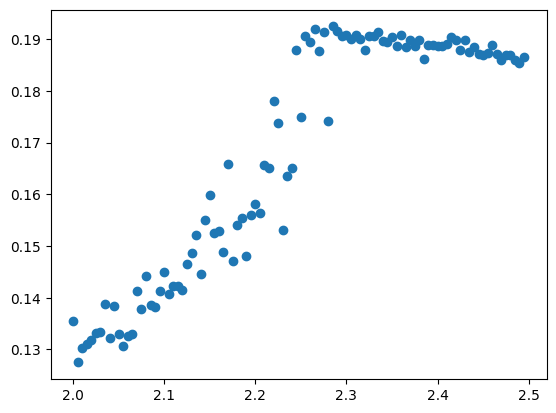

In [481]:
plt.scatter(T, chi)

In [537]:


# Exponential decay function
def exponential_decay(x,k,A):
    return A* np.exp(-x / k)

In [549]:
def cor_len(data):
    T =data.shape[0]
    Ks = []
    for i in range(T):
        max_ind = np.where(data.iloc[i] <0 )[0].min()
        popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(max_ind)], np.abs(data.iloc[i][:max_ind]), p0=(2.5,0.05), maxfev=20000 )
        Ks.append(popt[0])
    return data.index, Ks


In [550]:
def get_cor_len_avg(scs):
    cvs = []
    for sc in scs:
        T,k = cor_len(sc)
        cvs.append(k)
    
    means = []
    errs = []
    for i in range(len(cvs[0])):
        means.append(np.mean(np.matrix(cvs)[:,i]))
        errs.append(np.std(np.matrix(cvs)[:,i]))
    return pd.Series(means),pd.Series(errs)

In [565]:
k, err= get_cor_len_avg(scs)
T=scs[0].index
Tc = 2.26
t = (T - Tc)/Tc

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33068/2979831665.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(max_ind)], np.abs(data.iloc[i][:max_ind]), p0=(2.5,0.05), maxfev=20000 )


In [389]:
list(t [t < tol])[-1]

0.10398230088495099

In [566]:
tol = 0.15
max_ind = list(t).index(list(t [t < tol])[-1])
min_ind = list(t).index(list(t [t > -tol])[0])

t= t[min_ind:max_ind]
k = k[min_ind:max_ind]
err = err[min_ind:max_ind]

In [391]:
max_ind

61

In [392]:
min_ind

0

In [577]:
def get_v(t, v, A1, A2,C, tol = 0.01, tol2= 0.025):
    
    y = np.piecewise(t, [t < -tol, t > tol2,(t > -tol)& (t < tol2) ],
                     [lambda t:A1*np.abs(t)**(-v) , lambda t:A2*np.abs(t)**(-v), C])
    # y = np.piecewise(t, [t < -tol, t > -tol,],
    #                  [lambda t:A1*np.abs(t)**(-v) , C])
    return y
    

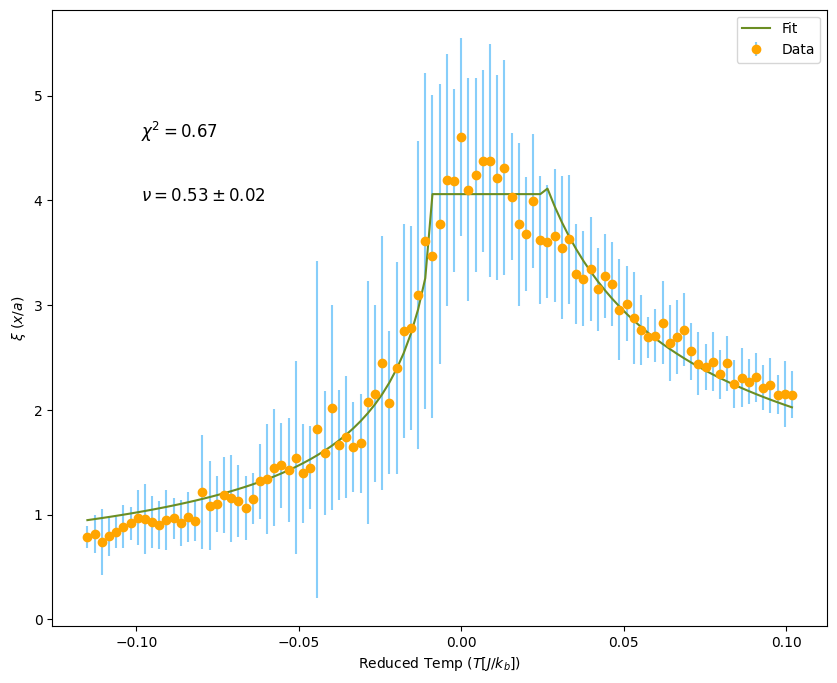

In [586]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(t, k, yerr= err, fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data" )
#plt.title("Heat Capacity Critical Exponent")
popt, pcov = curve_fit(get_v, np.array(t),k, p0=(1, 0.14, 0.15, 0.2))
plt.plot(t, get_v(np.array(t),*popt ), color= "olivedrab", label = "Fit")
#plt.scatter(t[t<-0.02],0.0085/np.abs(t[t<-0.02]))
#plt.scatter([i for i in t if np.abs(i) > 0.5], [0.15/np.abs(i)  for i in t if np.abs(i) > 0.5 ], color= "red", label = "expected")
plt.text(-0.1, 4.6, r' $\chi^2=0.67$', fontsize=12)
plt.text(-0.1, 4,r' $\nu={0:.2f} \pm {1:.2f} $'.format(popt[0], np.sqrt(pcov[0][0])), fontsize=12)
plt.legend()
plt.xlabel("Reduced Temp ($T[J/k_b]$)")
plt.ylabel(r"$\xi$ ($x/a$)")
plt.show()

In [582]:
chi2 = 0
for i in range(0,len(t)):
    
    chi2 += (list(get_v(np.array(t), *popt))[i] - list(k)[i])**2/(np.sqrt(np.abs(list(t)[i])*np.sqrt(pcov[0][0]) * np.sqrt(pcov[1][1]))*0.15)

chi2/len(t)

21717015.464782663

In [349]:
popt

array([0.00902874, 0.14749191, 0.15      , 0.18868258])

In [324]:
np.sqrt(pcov[1][1])

inf

In [355]:
v = popt[0]
v

0.10218389580878838

In [356]:
v-1

-0.8978161041912116

TypeError: crit_decay() missing 1 required positional argument: 'A'

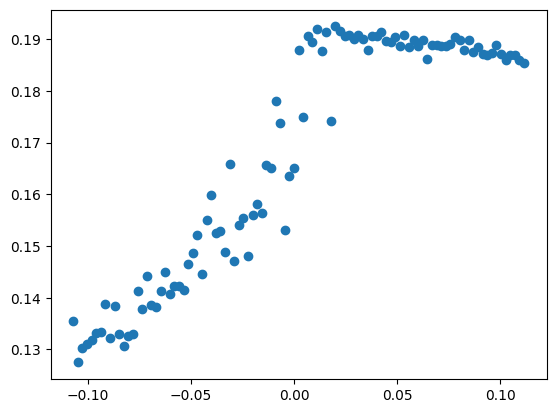

In [85]:
plt.scatter(t, k)
plt.plot(t, crit_decay(t, k= 1), color = "orange", label = "{}".format(popt[1]))
plt.legend()

### n

In [87]:
sc

,d=1,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,...,d=40,d=41,d=42,d=43,d=44,d=45,d=46,d=47,d=48,d=49
Temp,,,,,,,,,,,,,,,,,,,,,
2.000,0.000621,0.000156,0.000021,-0.000034,-0.000047,-0.000042,-0.000037,-0.000044,-0.000029,-0.000050,...,-0.000029,-0.000052,-0.000032,-0.000046,-0.000047,-0.000045,-0.000045,-0.000027,-0.000002,-0.000016
2.005,0.000392,0.000075,-0.000012,-0.000030,-0.000016,-0.000040,-0.000021,-0.000032,-0.000038,-0.000022,...,-0.000042,-0.000040,-0.000026,-0.000030,-0.000032,-0.000028,-0.000027,-0.000020,-0.000021,-0.000028
2.010,0.000463,0.000141,0.000032,-0.000017,-0.000034,-0.000061,-0.000044,-0.000060,-0.000047,-0.000061,...,-0.000056,-0.000044,-0.000021,-0.000013,-0.000034,-0.000038,-0.000036,-0.000021,-0.000056,-0.000056
2.015,0.000484,0.000164,0.000047,-0.000011,-0.000034,-0.000039,-0.000035,-0.000032,-0.000024,-0.000046,...,0.000006,-0.000033,-0.000034,-0.000054,-0.000055,-0.000043,-0.000039,-0.000053,-0.000043,-0.000030
2.020,0.000505,0.000151,0.000048,0.000001,-0.000033,-0.000052,-0.000039,-0.000015,-0.000031,-0.000006,...,-0.000028,-0.000055,-0.000065,-0.000054,-0.000019,-0.000028,-0.000026,-0.000026,-0.000028,-0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.475,0.004733,0.002969,0.002022,0.001333,0.000937,0.000660,0.000439,0.000233,0.000016,-0.000127,...,-0.000741,-0.000724,-0.000719,-0.000751,-0.000749,-0.000752,-0.000671,-0.000622,-0.000627,-0.000525
2.480,0.004737,0.002836,0.001917,0.001249,0.000743,0.000511,0.000456,0.000265,0.000142,-0.000055,...,-0.000599,-0.000483,-0.000485,-0.000543,-0.000495,-0.000413,-0.000467,-0.000459,-0.000480,-0.000525
2.485,0.004592,0.002634,0.001629,0.000931,0.000464,0.000200,0.000045,-0.000023,-0.000093,-0.000172,...,-0.000495,-0.000435,-0.000330,-0.000283,-0.000297,-0.000252,-0.000168,-0.000120,-0.000033,-0.000071


In [ ]:
[i+1 for i in range(sc.shape[1])]

In [89]:
T =sc.shape[0]
skip= 2
ns = []
for i in range(T):
    if sum(sc.iloc[i]) != 0:  
        popt, pcov = curve_fit(eta_func, [i+1 for i in range(skip, sc.shape[1])],np.abs(sc.iloc[i])[skip:], p0=(1/4, 0.00001), maxfev=2000 )
        ns.append(popt[0])

-0.005915194174448583


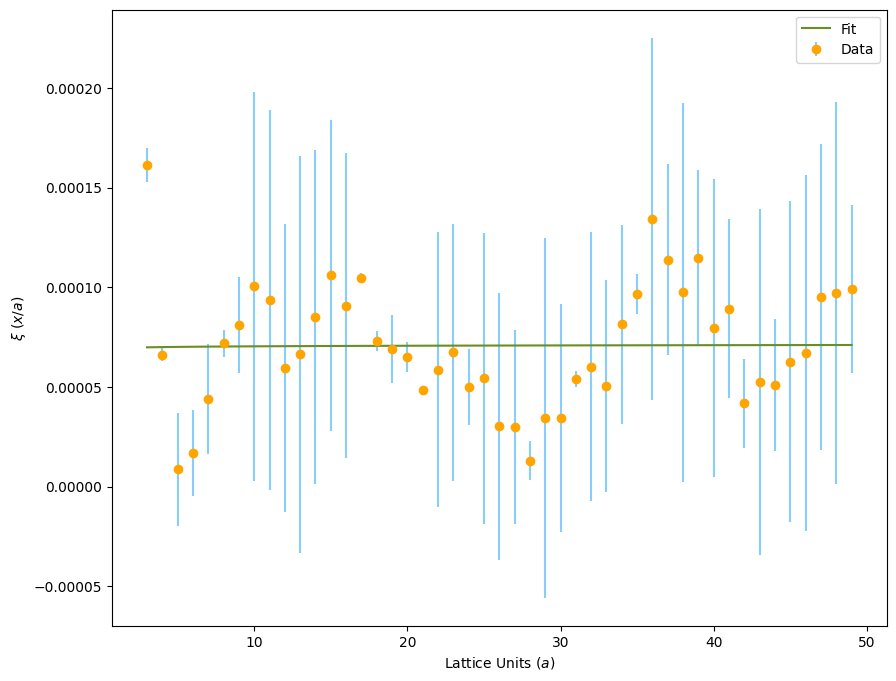

In [90]:
i = 20
skip= 2
fig = plt.figure(figsize= (10, 8))
plt.errorbar([i+1 for i in range(skip,sc.shape[1])], np.abs(sc.iloc[i])[skip:], yerr= (np.random.rand(sc.shape[1])*np.exp(np.abs(sc.iloc[i]))*0.0001)[skip:], fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data" )
#plt.title("Heat Capacity Critical Exponent")
popt, pcov = curve_fit(eta_func, [i+1 for i in range(skip, sc.shape[1])],np.abs(sc.iloc[i])[skip:], p0=(1/4, 0.001), maxfev=2000)
plt.plot([i+1 for i in range(skip, sc.shape[1])], eta_func([i+1 for i in range(skip,sc.shape[1])],*popt ), color= "olivedrab", label = "Fit")
#plt.text(35, 0.00475, r' $\chi^2=7.8$', fontsize=12)
#plt.text(35, 0.0045, r' $\eta={0:.2f}$'.format(popt[0]), fontsize=12)
print(popt[0])
plt.legend()
plt.xlabel("Lattice Units ($a$)")
plt.ylabel(r"$\xi$ ($x/a$)")
plt.show()

In [652]:
def eta_func(x,n,A):
    return A/(np.abs(x)**(n))

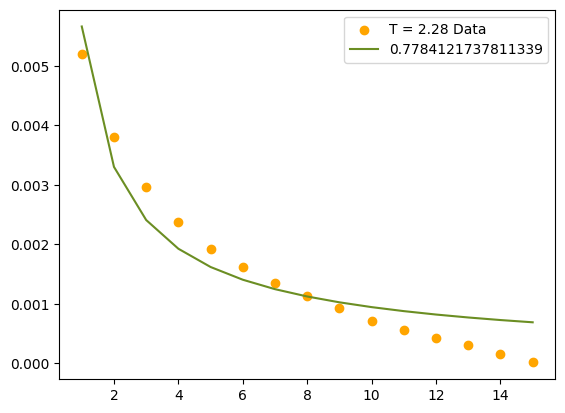

In [723]:
i= 56
max_ind = np.where(scs[-1].iloc[i] <0 )[0].min()
plt.scatter([i+1 for i in range(max_ind)], scs[-1].iloc[i][:max_ind],color = "orange", label= "T = {} Data".format(2.28) )
popt, pcov = curve_fit(eta_func, [i+1 for i in range(max_ind)], scs[-1].iloc[i][:max_ind], p0=(0.25,0.05), maxfev=20000 )
# plt.plot([i+1 for i in range(max_ind)], eta_func([i+1 for i in range(max_ind)],1/4, 0.005),  label= "0.25")
# plt.plot([i+1 for i in range(max_ind)], eta_func([i+1 for i in range(max_ind)],1/2, 0.005), label= "0.5")
# plt.plot([i+1 for i in range(max_ind)], eta_func([i+1 for i in range(max_ind)],1, 0.005), label= "1")

plt.plot([i+1 for i in range(max_ind)], eta_func([i+1 for i in range(max_ind)], *popt), color= "olivedrab", label = popt[0])
plt.legend()
plt.show()

In [658]:
popt

array([0.77841217, 0.0056656 ])

In [659]:
sc.index[56]

2.279999999999994

In [686]:
def get_etas(data):
    T =data.shape[0]
    ns = []
    for i in range(T):
        max_ind = np.where(data.iloc[i] <0.00 )[0].min()
        popt, pcov = curve_fit(eta_func, [i+1 for i in range(max_ind)], data.iloc[i][:max_ind], p0=(0.25,0.05), maxfev=20000 )
        ns.append(popt[0])
    return data.index, ns

In [687]:
def get_etas_avg(scs):
    cvs = []
    for sc in scs:
        T,k = get_etas(sc)
        cvs.append(k)
    
    means = []
    errs = []
    for i in range(len(cvs[0])):
        means.append(np.mean(np.matrix(cvs)[:,i]))
        errs.append(np.std(np.matrix(cvs)[:,i]))
    return pd.Series(means),pd.Series(errs)

In [688]:
ns, errs = get_etas_avg(scs)

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_33068/3502028481.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(eta_func, [i+1 for i in range(max_ind)], data.iloc[i][:max_ind], p0=(0.25,0.05), maxfev=20000 )


In [689]:
ns

0     2.040008
1     2.005333
2     2.105828
3     2.082416
4     2.004644
        ...   
95    1.052600
96    1.078255
97    1.073709
98    1.066502
99    1.096172
Length: 100, dtype: float64

In [690]:
t= scs[0].index

In [715]:
max_ind = list(t).index(list(t [t < 2.3])[-1])
min_ind = list(t).index(list(t [t > 2.245])[0])

t= t[min_ind:max_ind]
ns = ns[min_ind:max_ind]
errs = errs[min_ind:max_ind]

In [701]:
t.min()

2.234999999999995

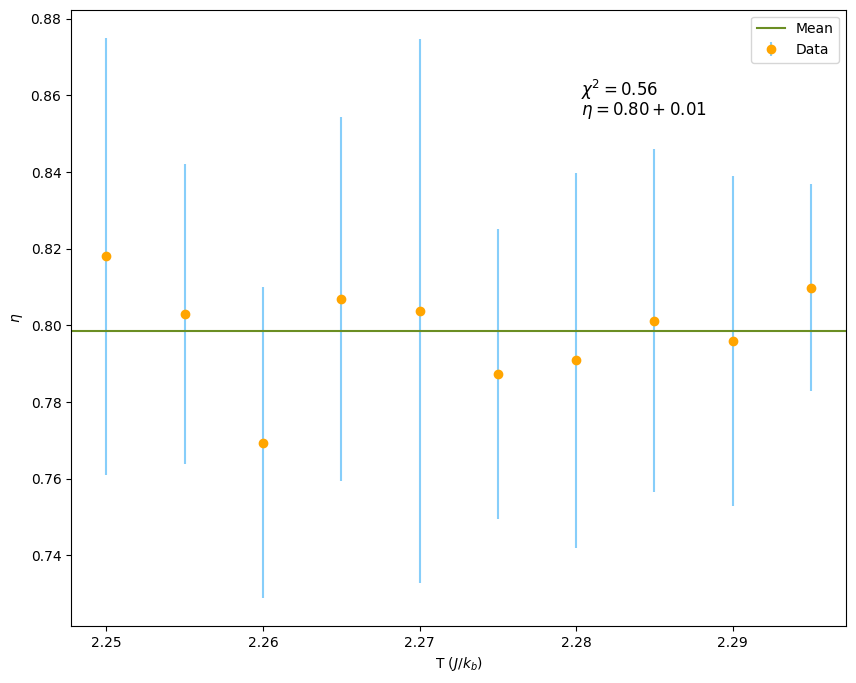

In [724]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(t, ns, yerr= errs/2, fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data" )
plt.axhline(np.mean(ns), label= "Mean",color= "olivedrab")
#plt.title("Heat Capacity Critical Exponent")
#popt, pcov = curve_fit(eta_func, [i+1 for i in range(skip, sc.shape[1])],np.abs(sc.iloc[i])[skip:], p0=(1/4, 0.001), maxfev=2000)
#plt.plot([i+1 for i in range(skip, sc.shape[1])], eta_func([i+1 for i in range(skip,sc.shape[1])],*popt ), color= "olivedrab", label = "Fit")
plt.text(2.28, 0.86, r' $\chi^2=0.56$', fontsize=12)
plt.text(2.28, 0.855, r' $\eta={0:.2f} + {1:.2f}$'.format(np.mean(ns), np.std(ns)), fontsize=12)
#print(popt[0])
plt.legend()
plt.xlabel("T ($J/k_b$)")
plt.ylabel(r"$\eta$")
plt.show()

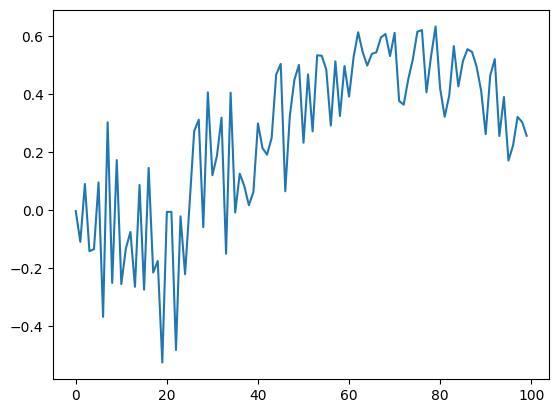

In [91]:
plt.plot(ns)

In [92]:
chi2 = 0
for i in range(0,sc.shape[1]):
    
    chi2 += (list(eta_func([i+1 for i in range(sc.shape[1])], *popt))[i] - list(np.abs(sc.iloc[i]))[i])**2/(np.sqrt(np.abs(list([i+1 for i in range(sc.shape[1])])[i])*np.sqrt(pcov[0][0]) * np.sqrt(pcov[1][1])))

chi2/len(t)

3.356590979801764e-06

In [93]:
n = np.mean(ns)
n

0.25140195837027834

In [94]:
(n -0.25)*4

0.005607833481113378

In [95]:
np.std(ns)

0.2797610241456046

#### Rushbrooke

In [96]:
alpha + 2*beta+gamma

1.6777499694920908

#### Josephson


In [97]:
2 - alpha - 2*v

1.8557689302718994

#### Fisher

In [98]:
gamma - (2 - n)*v 

1.3272696367312633

In [99]:
alpha

0.02951115922370034

In [464]:
beta

0.29048839269778076

In [465]:
gamma

0.37651030821645315

In [466]:
v

0.05767670725073007

In [467]:
n

0.919732309662107